In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [121]:
df = pd.read_csv('data_assignment.csv')
df.shape

(149999, 13)

In [122]:
df.dtypes

Id                    int64
Title                object
Company              object
Date                 object
Location             object
Area                 object
Classification       object
SubClassification    object
Requirement          object
FullDescription      object
LowestSalary          int64
HighestSalary         int64
JobType              object
dtype: object

In [123]:
df.columns

Index(['Id', 'Title', 'Company', 'Date', 'Location', 'Area', 'Classification',
       'SubClassification', 'Requirement', 'FullDescription', 'LowestSalary',
       'HighestSalary', 'JobType'],
      dtype='object')

In [124]:
df.describe(include = ['int64', 'object'])

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
count,1.499990e+05,149999,144237,149999,149999,93496,149999,149999,149999,146717,149999.000000,149999.000000,146766
unique,NaN,92115,26318,44,65,19,30,338,121324,127676,NaN,NaN,4
top,NaN,Project Manager,Jora Local,2018-10-17T00:00:00.000Z,Sydney,CBD & Inner Suburbs,Information & Communication Technology,Other,#NAME?,"<p><strong>At ALDI, our people are the key to ...",NaN,NaN,Full Time
freq,NaN,592,4896,13059,46357,24302,16661,8691,168,115,NaN,NaN,96410
mean,3.752134e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.901766,86.072374,NaN
std,1.019004e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.420658,56.932917,NaN
min,3.679538e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,30.000000,NaN
25%,3.742646e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,40.000000,NaN
50%,3.750692e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,70.000000,NaN
75%,3.760540e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,120.000000,NaN


In [125]:
df['Date'].unique().min()

'2018-10-01T00:00:00.000Z'

In [126]:
df['Date'].unique().max()

'2018-11-13T00:00:00.000Z'

In [127]:
df['Classification'].describe()

count                                     149999
unique                                        30
top       Information & Communication Technology
freq                                       16661
Name: Classification, dtype: object

In [128]:
df['Classification'].value_counts()

Information & Communication Technology    16661
Trades & Services                         14125
Healthcare & Medical                      12515
Hospitality & Tourism                     11818
Manufacturing, Transport & Logistics       9608
Administration & Office Support            7636
Accounting                                 7075
Education & Training                       7033
Retail & Consumer Products                 6496
Sales                                      6281
Construction                               6254
Government & Defence                       5926
Engineering                                4812
Mining, Resources & Energy                 4679
Community Services & Development           3528
Banking & Financial Services               3481
Human Resources & Recruitment              3233
Call Centre & Customer Service             3127
Legal                                      3071
Marketing & Communications                 3052
Real Estate & Property                  

In [129]:
df['Location'].value_counts()

Sydney                                  46357
Melbourne                               35315
Brisbane                                16538
Perth                                    9913
Adelaide                                 4998
                                        ...  
Coober Pedy & Outback SA                   78
Tumut, Snowy & Monaro                      69
Somerset & Lockyer                         56
Fleurieu Peninsula & Kangaroo Island       53
Central & South East TAS                   36
Name: Location, Length: 65, dtype: int64

In [130]:
len(df['Classification'].unique())

30

In [131]:
infoTech = df[df['Classification']=='Information & Communication Technology']
infoTech['SubClassification'].value_counts()

Developers/Programmers                   3069
Business/Systems Analysts                2076
Programme & Project Management           1665
Architects                               1110
Engineering - Software                   1087
Help Desk & IT Support                   1074
Networks & Systems Administration         927
Consultants                               849
Other                                     742
Testing & Quality Assurance               606
Management                                561
Security                                  524
Engineering - Network                     402
Database Development & Administration     395
Web Development & Production              351
Sales - Pre & Post                        349
Product Management & Development          281
Telecommunications                        269
Team Leaders                              141
Engineering - Hardware                     94
Technical Writing                          77
Computer Operators                

In [132]:
len(infoTech['SubClassification'].unique())

22

In [133]:
salGrp = df.groupby(['LowestSalary', 'HighestSalary'])
salGrp['Id'].count()

LowestSalary  HighestSalary
0             30               27606
30            40               12441
40            50               17708
50            60               12559
60            70               14108
70            80               12932
80            100              12582
100           120              13062
120           150              10651
150           200              11738
200           250               4612
Name: Id, dtype: int64

In [134]:
jobSal = df.groupby(['JobType'])
jobSal['LowestSalary', 'HighestSalary'].agg({'LowestSalary':min, 'HighestSalary':max})

C:\Users\maddi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,LowestSalary,HighestSalary
JobType,,
Casual/Vacation,0,250
Contract/Temp,0,250
Full Time,0,250
Part Time,0,250


In [135]:
df['AverageSalary'] = (df['LowestSalary']+df['HighestSalary'])/2
df[df['HighestSalary']==250].head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
22979,37399499,General Manager,AIMS International Executive Search,2018-10-05T00:00:00.000Z,Sydney,"CBD, Inner West & Eastern Suburbs",CEO & General Management,General/Business Unit Manager,• Specially FMCG Products Experience • Must ha...,<ul>\n <li><strong>Specially FMCG P...,200,250,Full Time,225.0
22980,37398700,Chief Operating Officer,AIMS International Executive Search,2018-10-05T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,CEO & General Management,COO & MD,Automotive Aftermarket Products • ASX Business...,<ul>\n <li><strong>Automotive After...,200,250,Full Time,225.0
22981,37398465,Managing Director,AIMS International Executive Search,2018-10-05T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,CEO & General Management,CEO,• Base Salary to $280K plus Bonus • Property a...,<ul>\n <li><strong>Base Salary to $...,200,250,Full Time,225.0
22982,37398318,CHIEF INFORMATION OFFICER,Hender Consulting,2018-10-04T00:00:00.000Z,West Gippsland & Latrobe Valley,NaN,CEO & General Management,General/Business Unit Manager,Pivotal IT leadership role with well establish...,<p><strong>Latrobe Health Services</strong></p...,200,250,Full Time,225.0
22983,37398206,CHIEF INFORMATION OFFICER,Hender Consulting,2018-10-04T00:00:00.000Z,Bairnsdale & Gippsland,NaN,CEO & General Management,General/Business Unit Manager,Pivotal IT leadership role with well establish...,<p><strong>Latrobe Health Services</strong></p...,200,250,Full Time,225.0


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149999 entries, 0 to 149998
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Id                 149999 non-null  int64  
 1   Title              149999 non-null  object 
 2   Company            144237 non-null  object 
 3   Date               149999 non-null  object 
 4   Location           149999 non-null  object 
 5   Area               93496 non-null   object 
 6   Classification     149999 non-null  object 
 7   SubClassification  149999 non-null  object 
 8   Requirement        149999 non-null  object 
 9   FullDescription    146717 non-null  object 
 10  LowestSalary       149999 non-null  int64  
 11  HighestSalary      149999 non-null  int64  
 12  JobType            146766 non-null  object 
 13  AverageSalary      149999 non-null  float64
dtypes: float64(1), int64(3), object(10)
memory usage: 16.0+ MB


In [137]:
#need to convert id to string to find the length 
idAsString = df['Id'].astype(str) 
#idAsString

#df[idsToCut]
# function to change Id entrie to 8 characters. 
#df['Id'].apply(function)


In [138]:
#remove time from date
df['Date'].describe()

count                       149999
unique                          44
top       2018-10-17T00:00:00.000Z
freq                         13059
Name: Date, dtype: object

In [139]:
df['Date'] = pd.to_datetime(df['Date']).dt.date
df['Date']

0         2018-10-07
1         2018-10-07
2         2018-10-07
3         2018-10-07
4         2018-10-07
             ...    
149994    2018-11-13
149995    2018-11-13
149996    2018-11-13
149997    2018-11-13
149998    2018-11-13
Name: Date, Length: 149999, dtype: object

In [140]:
df['Date'].describe()

count         149999
unique            44
top       2018-10-17
freq           13059
Name: Date, dtype: object

In [141]:
df['Id'] = pd.to_numeric(df['Id'])
df['Id'].describe()

count    1.499990e+05
mean     3.752134e+07
std      1.019004e+05
min      3.679538e+07
25%      3.742646e+07
50%      3.750692e+07
75%      3.760540e+07
max      3.771072e+07
Name: Id, dtype: float64

In [142]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149999 entries, 0 to 149998
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Id                 149999 non-null  int64         
 1   Title              149999 non-null  object        
 2   Company            144237 non-null  object        
 3   Date               149999 non-null  datetime64[ns]
 4   Location           149999 non-null  object        
 5   Area               93496 non-null   object        
 6   Classification     149999 non-null  object        
 7   SubClassification  149999 non-null  object        
 8   Requirement        149999 non-null  object        
 9   FullDescription    146717 non-null  object        
 10  LowestSalary       149999 non-null  int64         
 11  HighestSalary      149999 non-null  int64         
 12  JobType            146766 non-null  object        
 13  AverageSalary      149999 non-null  float64 

In [143]:
duplicates = df[df.duplicated()]
len(duplicates)

0

In [144]:
dupNoId = df[df.duplicated(['Title', 'Company', 'Date', 'Location', 'Area', 'Classification',
       'SubClassification', 'Requirement', 'FullDescription', 'LowestSalary',
       'HighestSalary', 'JobType', 'AverageSalary'])]
len(dupNoId)

611

In [145]:
df.drop_duplicates(subset=['Title', 'Company', 'Date', 'Location', 'Area', 'Classification',
       'SubClassification', 'Requirement', 'FullDescription', 'LowestSalary',
       'HighestSalary', 'JobType', 'AverageSalary'], keep = 'first', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149388 entries, 0 to 149998
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Id                 149388 non-null  int64         
 1   Title              149388 non-null  object        
 2   Company            143628 non-null  object        
 3   Date               149388 non-null  datetime64[ns]
 4   Location           149388 non-null  object        
 5   Area               93156 non-null   object        
 6   Classification     149388 non-null  object        
 7   SubClassification  149388 non-null  object        
 8   Requirement        149388 non-null  object        
 9   FullDescription    146124 non-null  object        
 10  LowestSalary       149388 non-null  int64         
 11  HighestSalary      149388 non-null  int64         
 12  JobType            146173 non-null  object        
 13  AverageSalary      149388 non-null  float64 

In [146]:
dupNoId

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
1837,37402347,Senior SAP HR Functional Analyst,Queensland Rail,2018-10-05,Brisbane,CBD & Inner Suburbs,Government & Defence,Government - State,We currently have an exciting opportunity for ...,<p>We are a large and fully integrated infrast...,0,30,Contract/Temp,15.0
2892,37401116,Diesel Fitter | Lifestyle Roster,Hays Resources & Mining,2018-10-05,Rockhampton & Capricorn Coast,NaN,"Mining, Resources & Energy",Mining - Engineering & Maintenance,Experienced Mine Site Diesel Fitter Job requir...,<p>Experienced Mine Site Diesel Fitter Job req...,0,30,Contract/Temp,15.0
4097,37394554,Aboriginal and Torres Strait Islander (ATSI) T...,Federation University Australia,2018-10-04,Ballarat & Central Highlands,NaN,Education & Training,Other,"-\tFull-time, fixed-term appointment in Ballar...",<p><strong>Human Resources – SMB Campus</stron...,30,40,Full Time,35.0
4465,37322096,TELSTRA | Sales Consultant | DO YOU WANT YOUR ...,TSA Group,2018-10-04,Melbourne,Eastern Suburbs,Sales,Sales Representatives/Consultants,"Outbound Sales to Current customers, contactin...",<p><strong><em>Our Company:</em></strong></p>\...,30,40,Full Time,35.0
5878,37398630,Claims Consultant - Lodgement,Hays Talent Solutions,2018-10-05,Sydney,Parramatta & Western Suburbs,Hospitality & Tourism,Waiting Staff,"Inbound call centre role, you will be the firs...",NaN,40,50,NaN,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148889,37696707,Motor Assessor,Hays Talent Solutions,2018-11-12,Sydney,"CBD, Inner West & Eastern Suburbs",Insurance & Superannuation,Assessment,Working as a Motor Assessor on automotive clai...,<p><strong>#Closer #Braver #Faster</strong></p...,70,80,Full Time,75.0
149106,37710595,Motor Assessor,Hays Talent Solutions,2018-11-13,Sydney,"CBD, Inner West & Eastern Suburbs",Insurance & Superannuation,Assessment,Working as a Motor Assessor on automotive clai...,<p><strong>#Closer #Braver #Faster</strong></p...,0,30,Full Time,15.0
149511,37709880,Retail Assistant,Aldi Stores,2018-11-13,Blue Mountains & Central West,NaN,Retail & Consumer Products,Retail Assistants,Whether they’re racing to fill shelves or scan...,"<p><strong>At ALDI, our people are the key to ...",0,30,Part Time,15.0
149720,37709615,HR Manager / HR Business Partner,Frazer Jones,2018-11-13,Melbourne,CBD & Inner Suburbs,Human Resources & Recruitment,Consulting & Generalist HR,Partnering with specific client group of fee-e...,<p>Join this Global Professional Services Firm...,0,30,Contract/Temp,15.0


In [147]:
df

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149994,37709314,Dance Studio Coordinator,Grace Lutheran College,2018-11-13,Brisbane,Northern Suburbs,Education & Training,Management - Schools,Grace has a highly-regarded and active Perform...,<p>Grace has a highly-regarded and active Perf...,0,30,Part Time,15.0
149995,37709313,Geology Technician,Saracen Gold Mines Pty Ltd,2018-11-13,"Kalgoorlie, Goldfields & Esperance",NaN,"Mining, Resources & Energy",Mining - Exploration & Geoscience,"Due to an increase in our Exploration budget, ...","<p style=""text-align:justify;"">Saracen Mineral...",0,30,Full Time,15.0
149996,37709312,Lead Product Manager UX/UI,Opus Recruitment Solutions,2018-11-13,Melbourne,CBD & Inner Suburbs,Design & Architecture,Graphic Design,Senior Lead Product Manager | UX/UI | Payment/...,One Australia’s leading online payments platfo...,0,30,Full Time,15.0
149997,37709253,Junior Primary Teacher,Covenant Christian School (ACT),2018-11-13,ACT,NaN,Education & Training,Teaching - Primary,Junior Primary teacher to take a small single ...,<p><strong>Junior Primary Teacher (part time o...,0,30,Full Time,15.0


In [148]:


#figure, axes = plt.subplots()
#ax.barh(len(dupNoId), dupNoId, color='orange')
#ax.barh(df.columns, width = len(df), align='right', color='blue')
#plt.show()



In [149]:
avSalCount = df['AverageSalary'].value_counts()
avSalCount

15.0     27523
45.0     17663
65.0     14060
110.0    12995
75.0     12893
55.0     12523
90.0     12494
35.0     12416
175.0    11677
135.0    10548
225.0     4596
Name: AverageSalary, dtype: int64

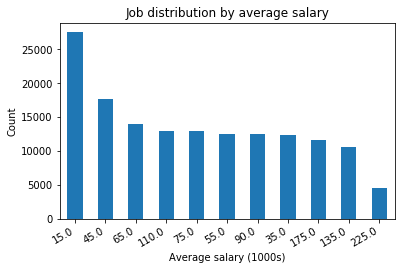

In [150]:
f1, ax1 = plt.subplots()
avSalCount.plot(kind='bar')
ax1.set_title('Job distribution by average salary')
plt.xlabel('Average salary (1000s)')
plt.ylabel('Count')
f1.autofmt_xdate()
plt.show()

In [151]:
jobTypeCount = df['JobType'].value_counts()
jobTypeCount

Full Time          95989
Contract/Temp      26142
Casual/Vacation    13454
Part Time          10588
Name: JobType, dtype: int64

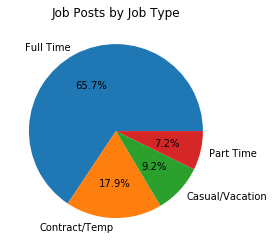

In [152]:
f2, ax2 = plt.subplots()
ax2.pie(jobTypeCount, labels = jobTypeCount.index, autopct = '%1.1f%%')
#jobTypeCount.plot(kind='pie')
ax2.set_title('Job Posts by Job Type')
plt.show()

In [153]:
jobClassCount = df['Classification'].count()
jobClassCount

149388

In [154]:
#3, a3 = plt.subplots()
#obClassCount.plot(kind='bar')


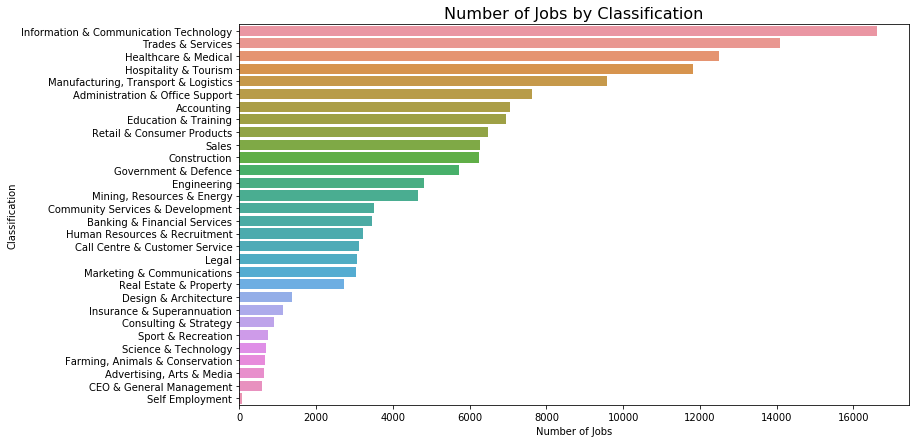

In [155]:
jobClassCount = df.groupby('Classification').count()
jobClassCount['Label'] = jobClassCount.index
jobClassCount['Count'] = jobClassCount['Id']
jobClassCount = jobClassCount.sort_values(by=['Count'], ascending = False)

plt.figure(figsize=(12,7))
barChart = sns.barplot(y='Label', x='Count', data=jobClassCount, dodge=False)

plt.title('Number of Jobs by Classification', {'fontsize': '16' })
plt.xlabel('Number of Jobs')
plt.ylabel('Classification')
plt.show()

In [156]:
brisClass = df[df['Location'] == 'Brisbane']['Classification'].value_counts()
bris

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
7,37404350,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,0,30,NaN,15.0
21,37404239,Casual Barista in Murarrie,Jora Local,2018-10-07,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Bar & Beverage Staff,A cafe in Murarrie is seeking a casual Barista...,NaN,0,30,NaN,15.0
26,37404396,Clinical Document Processing and Quality Assur...,West Moreton Hospital and Health Service,2018-10-07,Brisbane,Western Suburbs & Ipswich,Administration & Office Support,Records Management & Document Control,administrative and systems support in relation...,NaN,0,30,NaN,15.0
40,37404400,Project Officer,Metro South Health,2018-10-07,Brisbane,NaN,Administration & Office Support,Other,Asset and Infrastructure Services are looking ...,NaN,0,30,NaN,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149972,37709339,Recruitment Specialist | Healthcare | Brisbane...,Sugarman Australia,2018-11-13,Brisbane,CBD & Inner Suburbs,Human Resources & Recruitment,Recruitment - Agency,"Uncapped commission scheme,First year OTE ( $9...",<p><strong>Who is Sugarman Australia:</strong>...,0,30,Full Time,15.0
149975,37709336,Contracts Administrator,Lendlease,2018-11-13,Brisbane,CBD & Inner Suburbs,Construction,Contracts Management,Contracts Administrator required for upcoming ...,"<p style=""text-align:justify;"">Currently we ha...",0,30,Full Time,15.0
149986,37709323,Senior Business Service Accountant | CBD | 2nd...,MW Recruitment,2018-11-13,Brisbane,CBD & Inner Suburbs,Accounting,Business Services & Corporate Advisory,Opportunity to work in a 2nd tier practice bas...,"<p style=""text-align:justify;""><strong>About t...",0,30,Full Time,15.0
149991,37709317,KITCHEN MANAGER,Fritzenberger,2018-11-13,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Chefs/Cooks,Fritzenberger is looking for an energetic & pa...,<p><strong>BE A FRITZEN LEADER AT </strong><st...,0,30,Full Time,15.0


ValueError: could not convert string to float: 'RETAIL SALES SUPERSTARS and STYLISTS Wanted - Womens Fashion - SUNSHINE PLAZA'

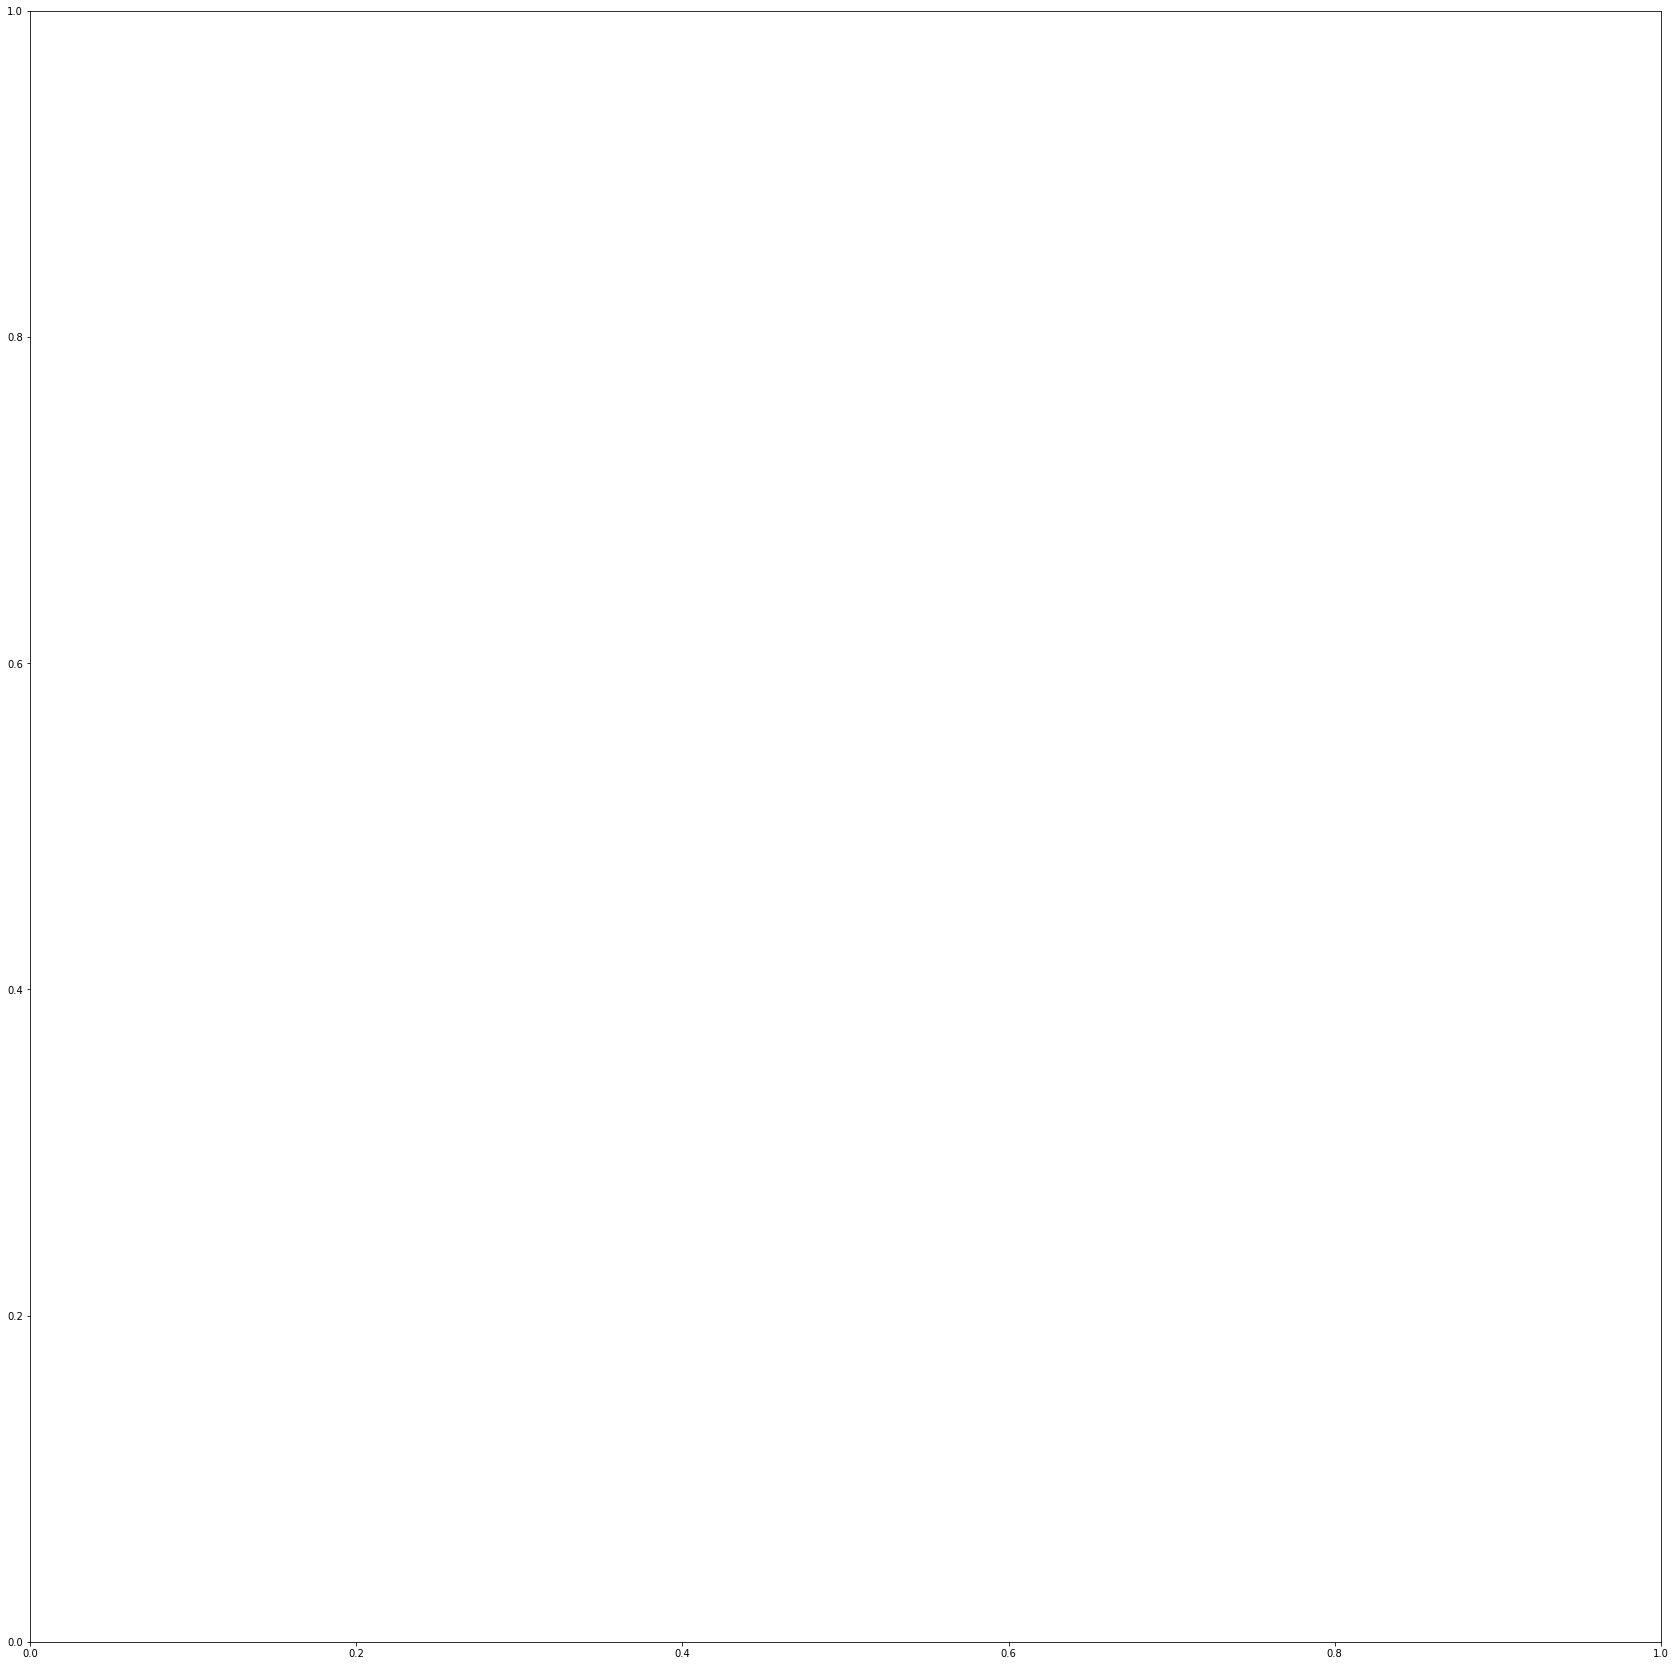

In [157]:
f4, ax4 = plt.subplots(1, 1, figsize=(30,30))
ax4.pie(bris, labels = bris.index, autopct = '%1.1f%%', textprops={'fontsize':24})
ax4.set_title('Brisbane Market Share')
plt.show()

In [ ]:
ascCities = df.groupby('Location').count().sort_values('Id', ascending=False)
top30 = ascCities.head(30).index
top30

In [ ]:
citySal = df.groupby('Location')['AverageSalary']

In [ ]:
top30Info = []
for city in top30:
    top30Info.append(citySal.get_group(city).values.tolist())

In [ ]:
f5, ax5 = plt.subplots(figsize=(35, 15))
box = ax5.boxplot(top30Info, widths=0.8)
ax5.set_title('Locations and the Average Highest Salary')
ax5.set_xlabel('Location')
ax5.set_ylabel('Salary')
ax5.set_xticklabels(top30)
f5.autofmt_xdate()
plt.show()

In [ ]:
df

In [158]:
bris = df[df['Location']=='Brisbane']
mel = df[df['Location'] == 'Melbourne']
bris['Id'].value_counts()

37687294    1
37456740    1
37614363    1
37643033    1
37395222    1
           ..
37606816    1
37595490    1
37627294    1
37606824    1
37584896    1
Name: Id, Length: 16461, dtype: int64

In [159]:
mel['Id'].value_counts()

37423103    1
37442944    1
37424523    1
37645703    1
37512582    1
           ..
37432240    1
37626801    1
37632946    1
37696435    1
37423105    1
Name: Id, Length: 35185, dtype: int64

In [160]:
bris['JobType'].value_counts()

Full Time          10381
Contract/Temp       3149
Casual/Vacation     1537
Part Time            982
Name: JobType, dtype: int64

In [161]:
mel['JobType'].value_counts()

Full Time          23193
Contract/Temp       5524
Casual/Vacation     2846
Part Time           2814
Name: JobType, dtype: int64

In [162]:
brisSectors = bris['Classification'].value_counts()
brisSectors.head(5)

Information & Communication Technology    2036
Trades & Services                         1625
Healthcare & Medical                      1336
Manufacturing, Transport & Logistics      1335
Hospitality & Tourism                     1030
Name: Classification, dtype: int64

In [163]:
melSectors = mel['Classification'].value_counts()
melSectors.head(5)

Information & Communication Technology    4204
Hospitality & Tourism                     3112
Trades & Services                         3028
Manufacturing, Transport & Logistics      2700
Healthcare & Medical                      2593
Name: Classification, dtype: int64

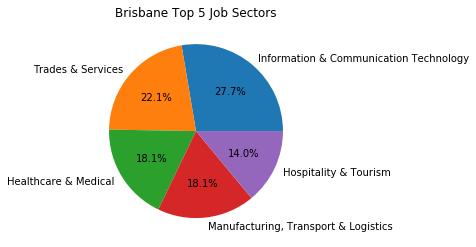

In [164]:
f7, ax7 = plt.subplots()
ax7.pie(brisSectors.head(5), labels = brisSectors.head(5).index, autopct = '%1.1f%%')
#jobTypeCount.plot(kind='pie')
ax7.set_title('Brisbane Top 5 Job Sectors')
plt.show()

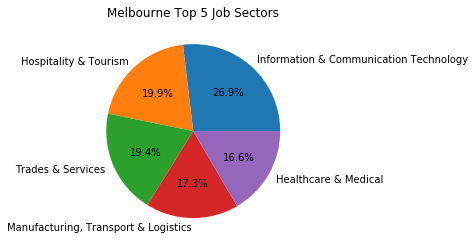

In [165]:
f8, ax8 = plt.subplots()
ax8.pie(melSectors.head(5), labels = melSectors.head(5).index, autopct = '%1.1f%%')
#jobTypeCount.plot(kind='pie')
ax8.set_title('Melbourne Top 5 Job Sectors')
plt.show()

In [166]:
bris['LowestSalary', 'HighestSalary']

KeyError: ('LowestSalary', 'HighestSalary')